In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
#train.head()

In [3]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

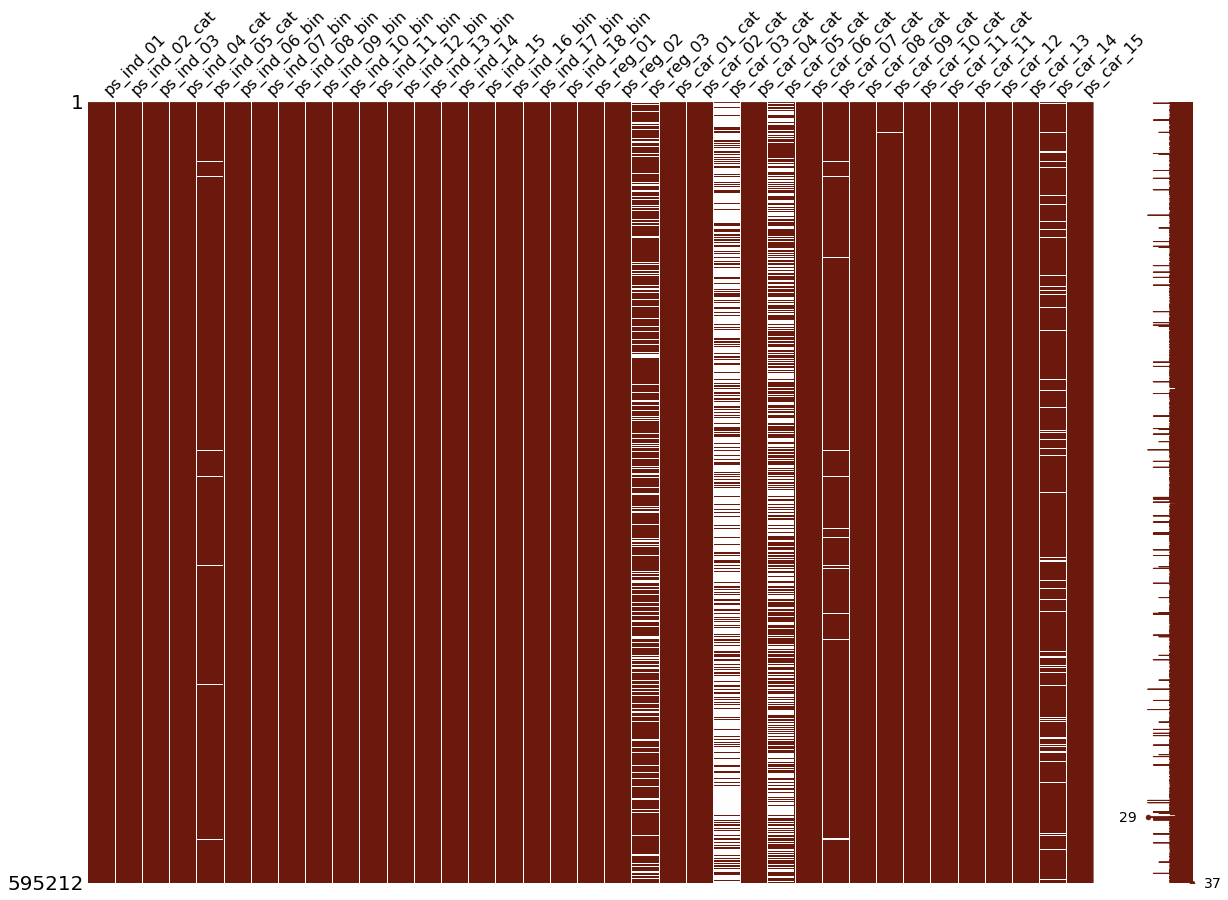

In [4]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

#ps_reg_03, ps_car_03_cat and ps_car_05_cat has many missing values, hence we need to be carefull while doing NA. For the time being we will just do na, but later try different things

In [5]:
data = [go.Bar(
            x = train["target"].value_counts().index.values,
            y = train["target"].value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

#Skewed target, Hence F1 score is more important than accuracy

In [6]:
#Remove colums if contains all NULL (none so here)
train = train.dropna(axis=1, how='all')

In [7]:
cols = train.columns.tolist()
print cols

['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [8]:
target = train.target
train.drop('target', axis=1, inplace=True)
train.drop('id', axis=1, inplace=True)
train.dtypes

#float64 are continuous variable , int64 are either binary or categorical

ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01        float64
ps_calc_02  

In [9]:
cols = train.columns.tolist()
print len(cols)
print(train.skew())
# May require transformaion of the skewed variables

57
ps_ind_01          0.931680
ps_ind_02_cat      1.968417
ps_ind_03          0.463530
ps_ind_04_cat      0.334045
ps_ind_05_cat      3.233451
ps_ind_06_bin      0.434969
ps_ind_07_bin      1.111987
ps_ind_08_bin      1.815643
ps_ind_09_bin      1.619880
ps_ind_10_bin     51.750836
ps_ind_11_bin     24.250343
ps_ind_12_bin     10.146791
ps_ind_13_bin     32.439893
ps_ind_14         12.207636
ps_ind_15         -0.285748
ps_ind_16_bin     -0.679399
ps_ind_17_bin      2.323081
ps_ind_18_bin      1.923076
ps_reg_01         -0.639473
ps_reg_02          1.281065
ps_reg_03         -1.013103
ps_car_01_cat     -0.534769
ps_car_02_cat     -1.756866
ps_car_03_cat      1.153700
ps_car_04_cat      3.179134
ps_car_05_cat      0.304932
ps_car_06_cat      0.097203
ps_car_07_cat     -4.125725
ps_car_08_cat     -1.776806
ps_car_09_cat     -0.422006
ps_car_10_cat     -9.968129
ps_car_11_cat     -0.235242
ps_car_11         -1.173385
ps_car_12          1.067176
ps_car_13          1.700536
ps_car_14        

In [10]:
train.describe()
# Different stastical figures

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


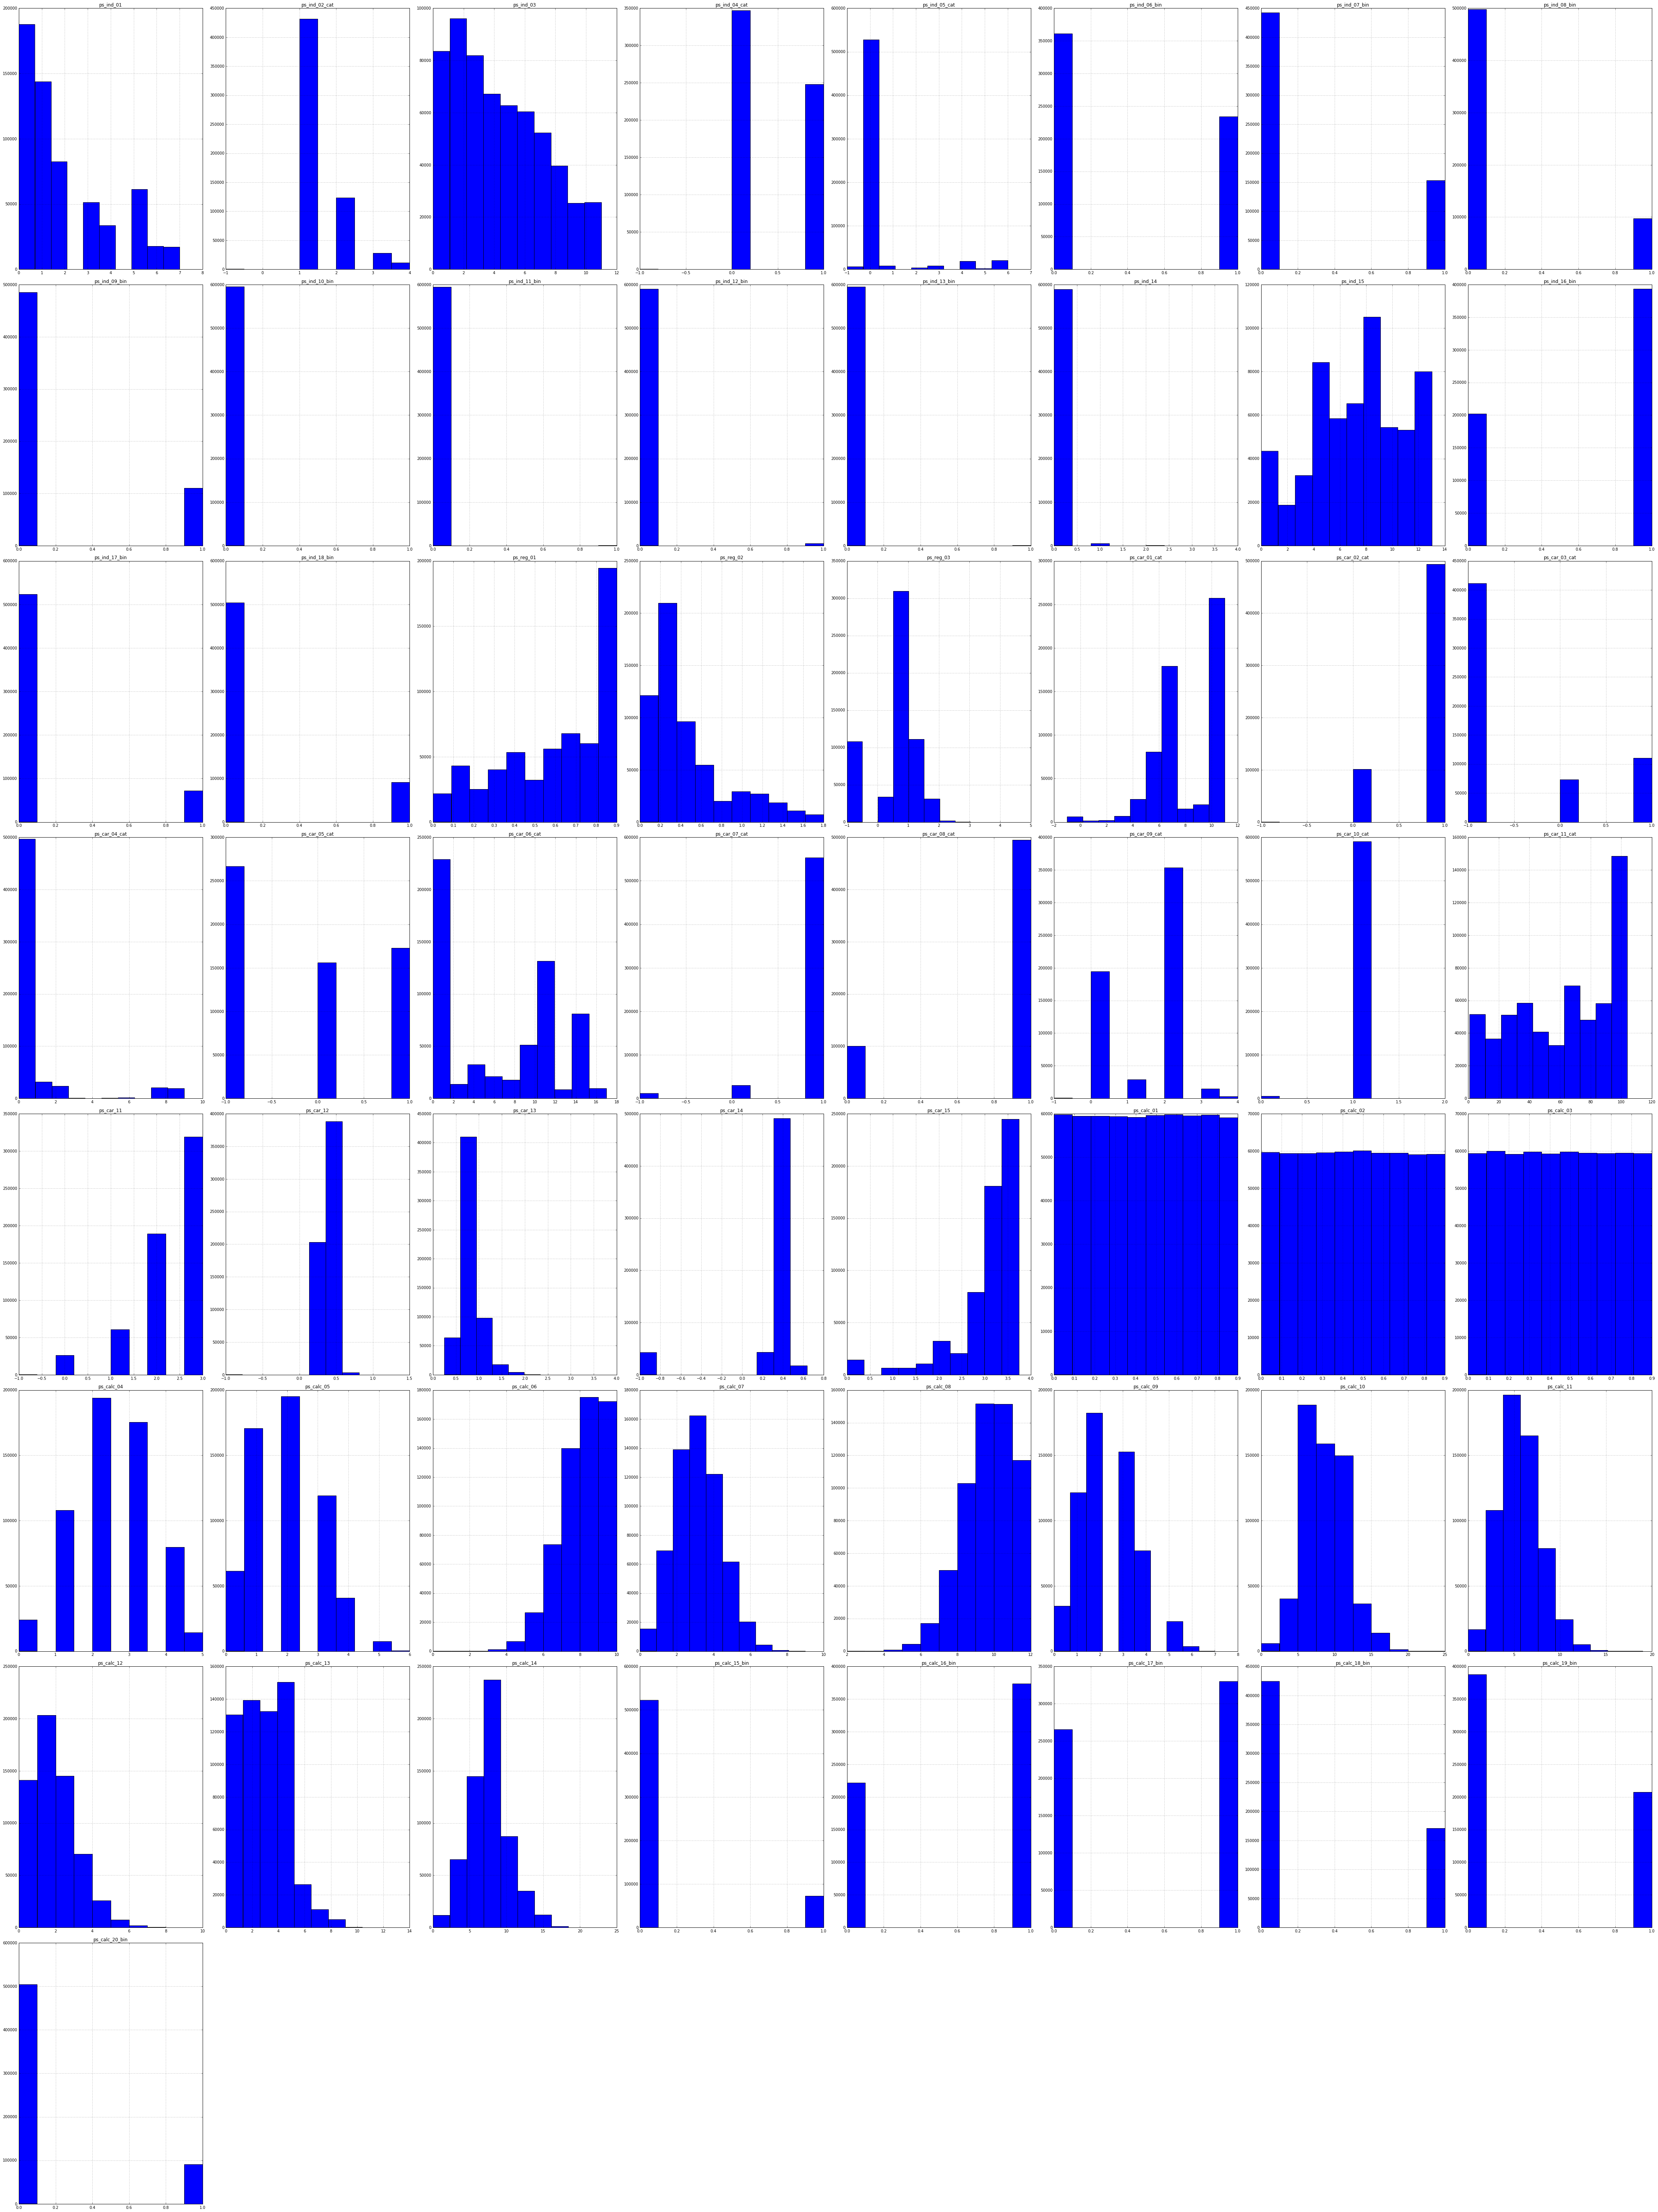

In [11]:
from sklearn import preprocessing
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(60,80))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

le = preprocessing.LabelEncoder()
for x in range(len(cols)):
    typ = train[cols[x]].dtype
    if typ == 'int64':
        train[cols[x]] = train[cols[x]].fillna(value=0)
    elif typ == 'float64':
        train[cols[x]] = train[cols[x]].fillna(value=0.0)
    elif typ == 'object':
        pass
        train[cols[x]] = train[cols[x]].fillna(value=0)
draw_histograms(train, train.columns, 8, 8)

#looking at the histogram of the input variable, some type of normalization of feature scaling may be required for some variables

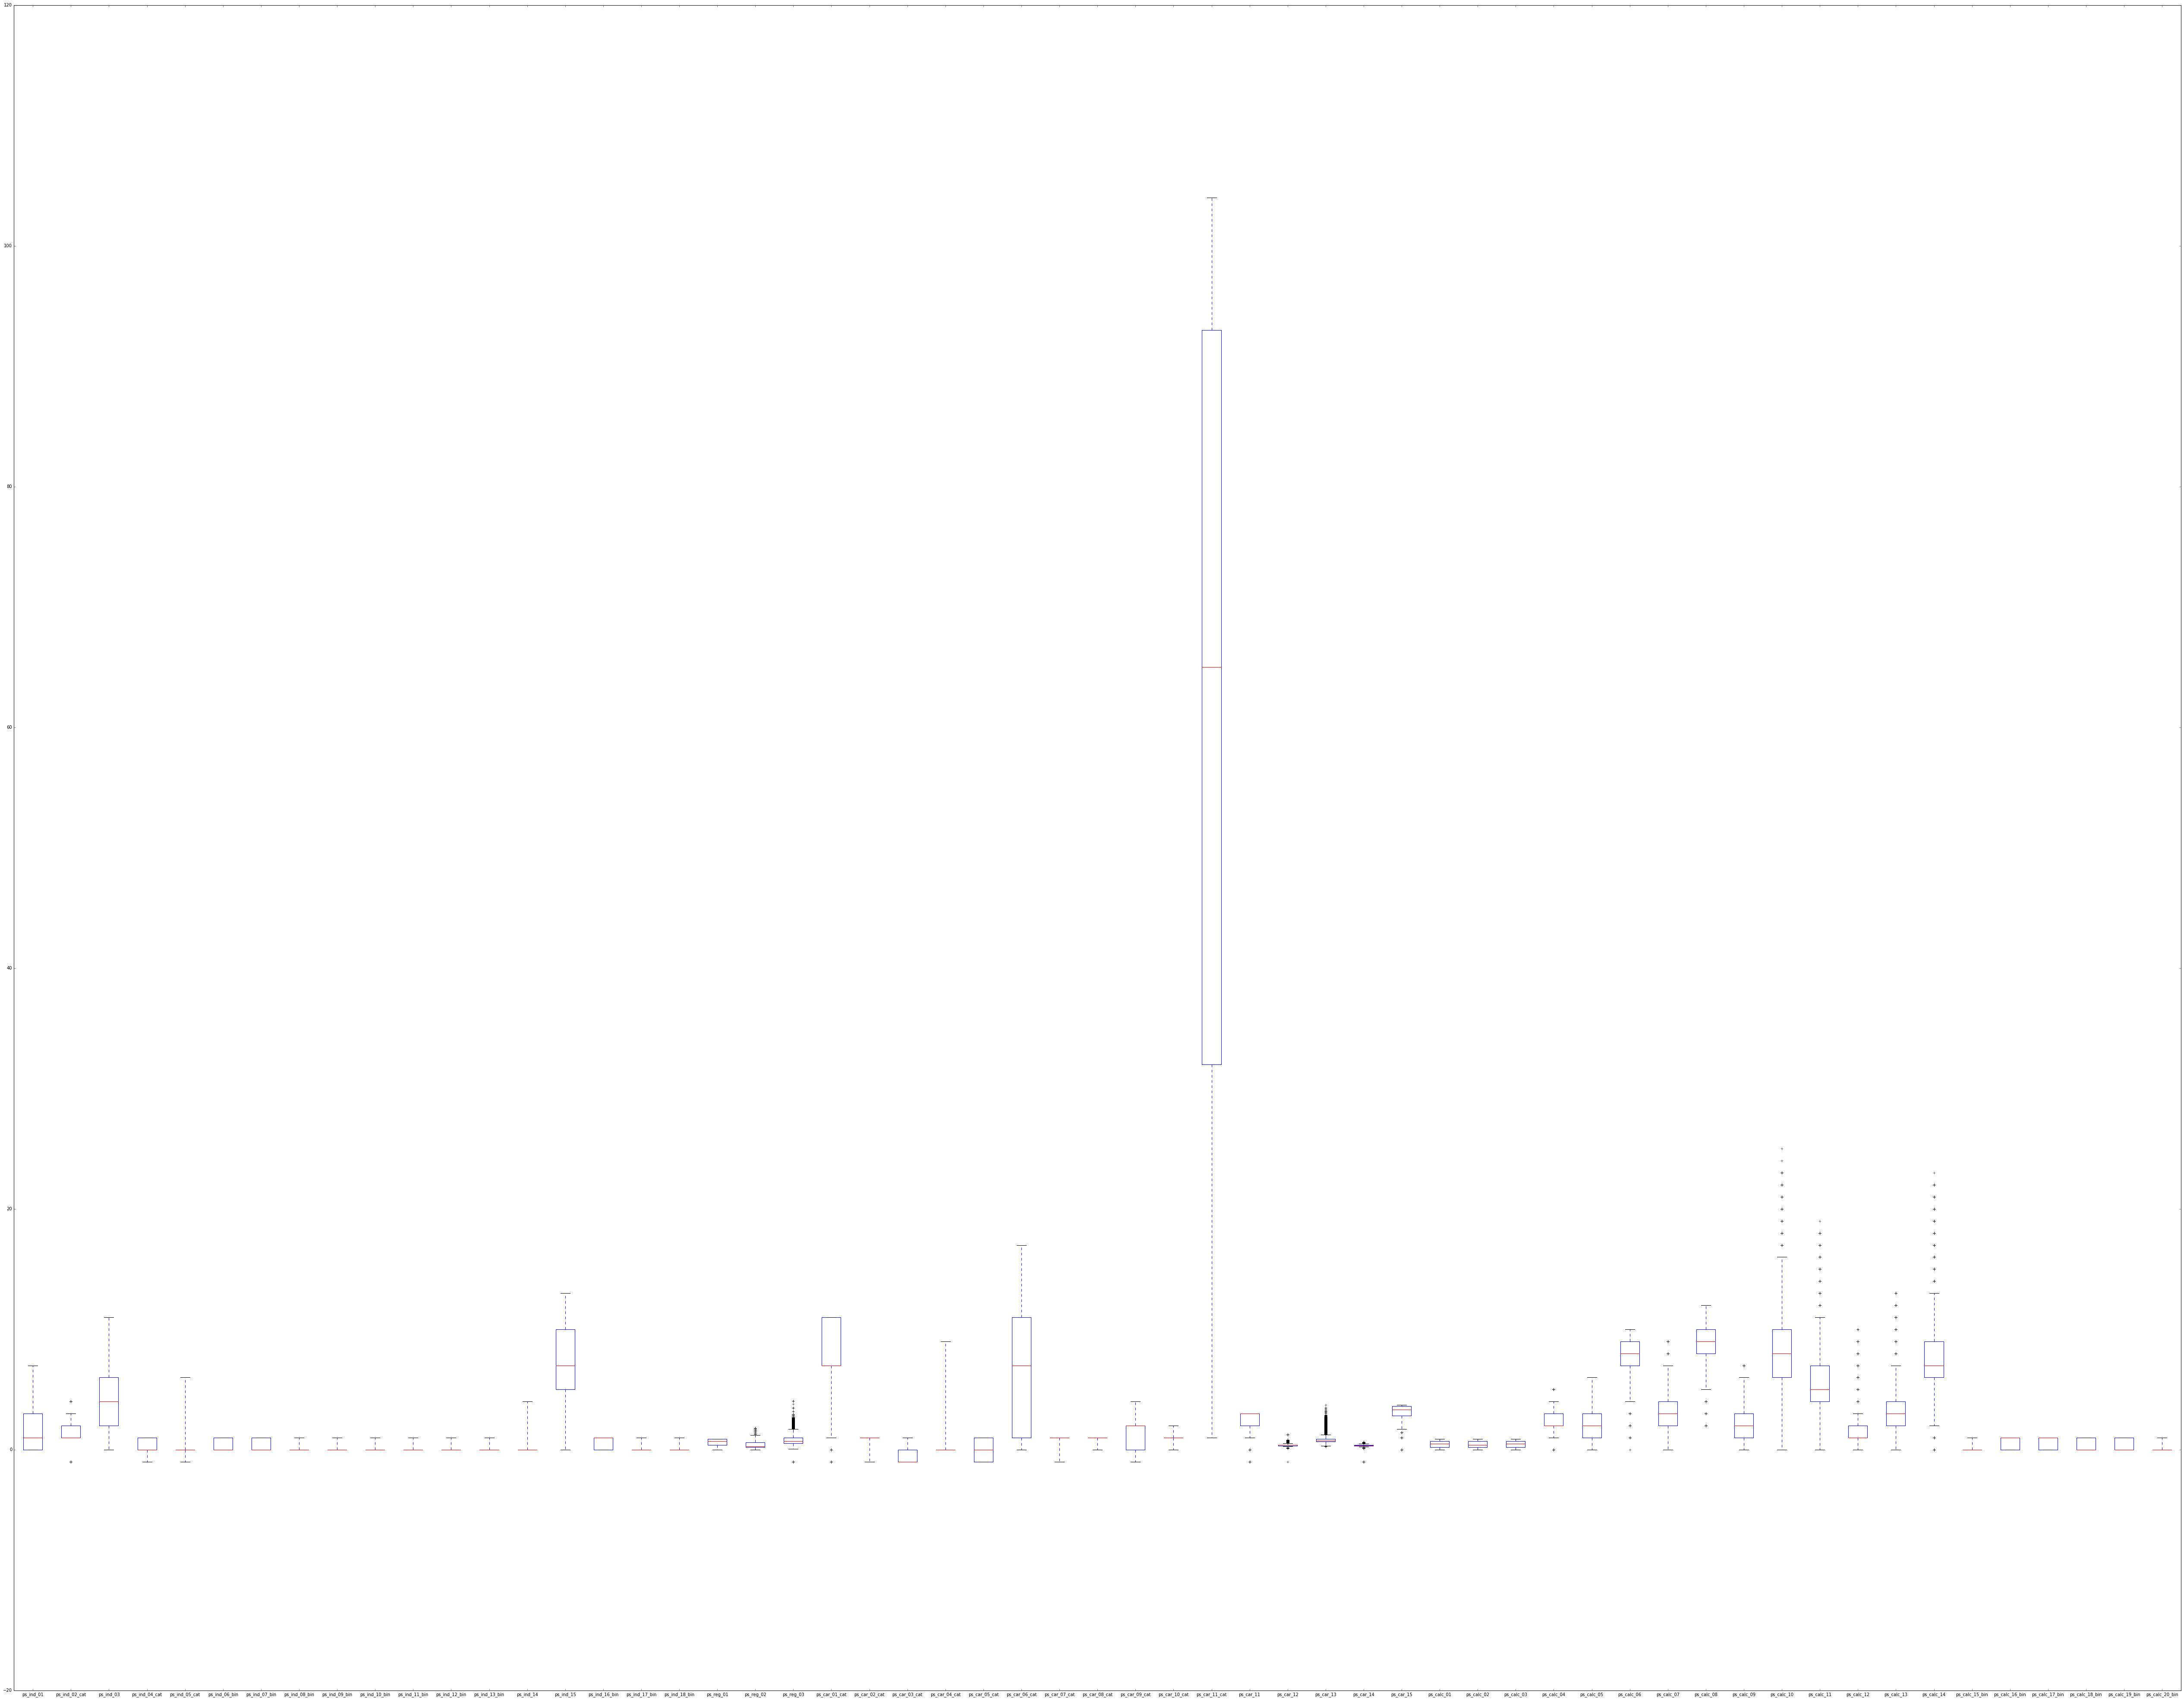

In [12]:
train.plot.box(return_type='axes', figsize=(90,70))
#Box plot of all varibales https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

In [13]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 47, dtype('float64'): 10})

In [14]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

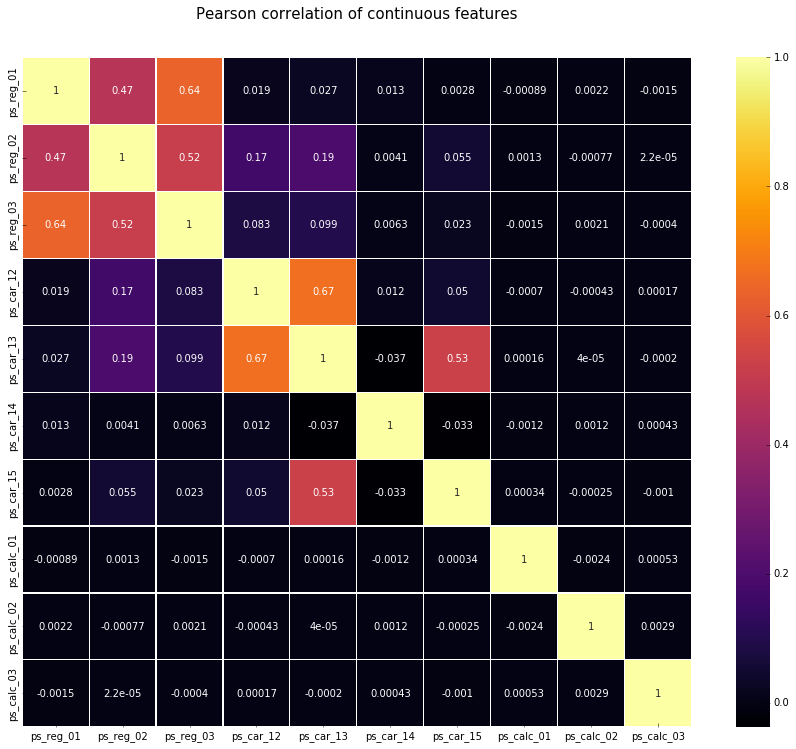

In [15]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#pearson correlation of continuous varibales shows some strong correlation between variables, we may have to drop some correlated varibales or have to transform them to new variables

In [16]:
cat_features = [a for a in train.columns if a.endswith('cat')]
print cat_features

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [17]:
import scipy 
from scipy.stats import spearmanr
from pylab import rcParams

In [18]:
train_cat = train[cat_features]
train_cat.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10,1,-1,0,1,4,1,0,0,1,12
1,1,0,0,11,1,-1,0,-1,11,1,1,2,1,19
2,4,1,0,7,1,-1,0,-1,14,1,1,2,1,60
3,1,0,0,7,1,0,0,1,11,1,1,3,1,104
4,2,1,0,11,1,-1,0,-1,14,1,1,2,1,82


In [19]:
bin_features = [a for a in train.columns if a.endswith('bin')]
print bin_features

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [20]:
bin_train = train[bin_features]
bin_train.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [21]:
#rcParams['figure.figsize'] = 5, 4
#sns.set_style("whitegrid")

In [22]:
#sns.pairplot(train_cat)

In [23]:
from scipy.stats import chi2_contingency
for x in range(len(cat_features)):
    for y in range((x+1), len(cat_features)):
        col1 = train_cat[cat_features[x]]
        col2 = train_cat[cat_features[y]]
        table = pd.crosstab(col1,col2)
        chi2, p, dof, expected = chi2_contingency(table.values)
        print cat_features[x], cat_features[y], ':'
        print 'Chi-square statistics: %0.3f p_value: %0.3f' % (chi2, p)
        
#chisquare test show heavy correlation between categorical vribales, not sure about it

ps_ind_02_cat ps_ind_04_cat :
Chi-square statistics: 220292.541 p_value: 0.000
ps_ind_02_cat ps_ind_05_cat :
Chi-square statistics: 19462.867 p_value: 0.000
ps_ind_02_cat ps_car_01_cat :
Chi-square statistics: 171090.605 p_value: 0.000
ps_ind_02_cat ps_car_02_cat :
Chi-square statistics: 2663.266 p_value: 0.000
ps_ind_02_cat ps_car_03_cat :
Chi-square statistics: 854.516 p_value: 0.000
ps_ind_02_cat ps_car_04_cat :
Chi-square statistics: 5890.042 p_value: 0.000
ps_ind_02_cat ps_car_05_cat :
Chi-square statistics: 2398.925 p_value: 0.000
ps_ind_02_cat ps_car_06_cat :
Chi-square statistics: 4758.918 p_value: 0.000
ps_ind_02_cat ps_car_07_cat :
Chi-square statistics: 6707.407 p_value: 0.000
ps_ind_02_cat ps_car_08_cat :
Chi-square statistics: 17.128 p_value: 0.002
ps_ind_02_cat ps_car_09_cat :
Chi-square statistics: 16748.229 p_value: 0.000
ps_ind_02_cat ps_car_10_cat :
Chi-square statistics: 157.163 p_value: 0.000
ps_ind_02_cat ps_car_11_cat :
Chi-square statistics: 34548.176 p_value: 0.

In [24]:
#from scipy.stats import chi2_contingency
for x in range(len(bin_features)):
    for y in range((x+1), len(bin_features)):
        col1 = bin_train[bin_features[x]]
        col2 = bin_train[bin_features[y]]
        table = pd.crosstab(col1,col2)
        chi2, p, dof, expected = chi2_contingency(table.values)
        print bin_features[x], bin_features[y], ':'
        print 'Chi-square statistics: %0.3f p_value: %0.3f' % (chi2, p)
        
#chisquare test of binary variables

ps_ind_06_bin ps_ind_07_bin :
Chi-square statistics: 133732.733 p_value: 0.000
ps_ind_06_bin ps_ind_08_bin :
Chi-square statistics: 75788.511 p_value: 0.000
ps_ind_06_bin ps_ind_09_bin :
Chi-square statistics: 87923.398 p_value: 0.000
ps_ind_06_bin ps_ind_10_bin :
Chi-square statistics: 47.025 p_value: 0.000
ps_ind_06_bin ps_ind_11_bin :
Chi-square statistics: 16.018 p_value: 0.000
ps_ind_06_bin ps_ind_12_bin :
Chi-square statistics: 181.882 p_value: 0.000
ps_ind_06_bin ps_ind_13_bin :
Chi-square statistics: 41.343 p_value: 0.000
ps_ind_06_bin ps_ind_16_bin :
Chi-square statistics: 478.333 p_value: 0.000
ps_ind_06_bin ps_ind_17_bin :
Chi-square statistics: 819.954 p_value: 0.000
ps_ind_06_bin ps_ind_18_bin :
Chi-square statistics: 82.123 p_value: 0.000
ps_ind_06_bin ps_calc_15_bin :
Chi-square statistics: 2.582 p_value: 0.108
ps_ind_06_bin ps_calc_16_bin :
Chi-square statistics: 0.085 p_value: 0.771
ps_ind_06_bin ps_calc_17_bin :
Chi-square statistics: 0.000 p_value: 0.999
ps_ind_06_bi

ps_ind_17_bin ps_calc_15_bin :
Chi-square statistics: 1.490 p_value: 0.222
ps_ind_17_bin ps_calc_16_bin :
Chi-square statistics: 0.025 p_value: 0.874
ps_ind_17_bin ps_calc_17_bin :
Chi-square statistics: 0.033 p_value: 0.855
ps_ind_17_bin ps_calc_18_bin :
Chi-square statistics: 0.001 p_value: 0.975
ps_ind_17_bin ps_calc_19_bin :
Chi-square statistics: 0.353 p_value: 0.552
ps_ind_17_bin ps_calc_20_bin :
Chi-square statistics: 2.184 p_value: 0.139
ps_ind_18_bin ps_calc_15_bin :
Chi-square statistics: 0.082 p_value: 0.774
ps_ind_18_bin ps_calc_16_bin :
Chi-square statistics: 0.004 p_value: 0.952
ps_ind_18_bin ps_calc_17_bin :
Chi-square statistics: 0.002 p_value: 0.963
ps_ind_18_bin ps_calc_18_bin :
Chi-square statistics: 0.003 p_value: 0.960
ps_ind_18_bin ps_calc_19_bin :
Chi-square statistics: 0.363 p_value: 0.547
ps_ind_18_bin ps_calc_20_bin :
Chi-square statistics: 0.306 p_value: 0.580
ps_calc_15_bin ps_calc_16_bin :
Chi-square statistics: 0.086 p_value: 0.770
ps_calc_15_bin ps_calc_1

In [25]:
#sns.pairplot(bin_train)

In [26]:
from sklearn.feature_selection import VarianceThreshold
train_bin_copy = bin_train
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(train_bin_copy)

print train_bin_copy.columns
print bin_train.columns

Index([u'ps_ind_06_bin', u'ps_ind_07_bin', u'ps_ind_08_bin', u'ps_ind_09_bin',
       u'ps_ind_10_bin', u'ps_ind_11_bin', u'ps_ind_12_bin', u'ps_ind_13_bin',
       u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_calc_15_bin',
       u'ps_calc_16_bin', u'ps_calc_17_bin', u'ps_calc_18_bin',
       u'ps_calc_19_bin', u'ps_calc_20_bin'],
      dtype='object')
Index([u'ps_ind_06_bin', u'ps_ind_07_bin', u'ps_ind_08_bin', u'ps_ind_09_bin',
       u'ps_ind_10_bin', u'ps_ind_11_bin', u'ps_ind_12_bin', u'ps_ind_13_bin',
       u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_calc_15_bin',
       u'ps_calc_16_bin', u'ps_calc_17_bin', u'ps_calc_18_bin',
       u'ps_calc_19_bin', u'ps_calc_20_bin'],
      dtype='object')


In [27]:
from sklearn.feature_selection import VarianceThreshold
train_cat_copy = train_cat
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(train_cat_copy)

print train_cat_copy.columns
print train_cat.columns

Index([u'ps_ind_02_cat', u'ps_ind_04_cat', u'ps_ind_05_cat', u'ps_car_01_cat',
       u'ps_car_02_cat', u'ps_car_03_cat', u'ps_car_04_cat', u'ps_car_05_cat',
       u'ps_car_06_cat', u'ps_car_07_cat', u'ps_car_08_cat', u'ps_car_09_cat',
       u'ps_car_10_cat', u'ps_car_11_cat'],
      dtype='object')
Index([u'ps_ind_02_cat', u'ps_ind_04_cat', u'ps_ind_05_cat', u'ps_car_01_cat',
       u'ps_car_02_cat', u'ps_car_03_cat', u'ps_car_04_cat', u'ps_car_05_cat',
       u'ps_car_06_cat', u'ps_car_07_cat', u'ps_car_08_cat', u'ps_car_09_cat',
       u'ps_car_10_cat', u'ps_car_11_cat'],
      dtype='object')


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print bin_train.head()
X_new = SelectKBest(chi2, k=5).fit_transform(bin_train, target)
X_new.shape

#SelectKbest does univariate feature selection , can ue chi2, ANOVA etc. http://scikit-learn.org/stable/modules/feature_selection.html
# K is number of most important features

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  \
0              0              1              0              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_16_bin  ps_ind_17_bin  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              1              0   
4              0              0              0              1              0   

   ps_ind_18_bin  ps_calc_15_bin  ps_c

(595212, 5)

In [29]:
print X_new

[[0 1 0 0 1]
 [0 0 1 0 0]
 [0 0 1 1 0]
 ..., 
 [1 0 0 1 0]
 [0 0 1 1 0]
 [1 0 0 1 0]]


In [30]:
#Tree based feature selection, I would first do the hyperparameter tuning usig GBM and then use SelectFromModel to choose the best features
#  have used the the link to do hyperparameter tuning

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search



In [31]:
#I ran following gridsearch method to come up with best parameters, hence commenting them

#param_test1 = {'n_estimators':range(20,81,10)}
#gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
#param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(train, target)

In [32]:
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [33]:
#param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
#gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
#param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch2.fit(train,target)
#gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [34]:
#param_test3 = {'min_samples_leaf':range(30,71,10)}
#gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,min_samples_split=600,max_features='sqrt', subsample=0.8, random_state=10), 
#param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch3.fit(train,target)
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [35]:
#param_test4 = {'max_features':range(30,46,2)}
#gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_split=600, min_samples_leaf=50, subsample=0.8, random_state=10),
#param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch4.fit(train,target)
#gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [36]:
#param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
#gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,min_samples_split=600, min_samples_leaf=50, random_state=10,max_features=31),
#param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch5.fit(train,target)
#gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

In [37]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [38]:
#param_test1 = {
# 'max_depth':range(3,10,2),
# 'min_child_weight':range(1,6,2)
#}
#gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
# min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=50, scale_pos_weight=1, seed=27), 
# param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(train,target)
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [39]:
#param_test2 = {
# 'max_depth':[5,6,7],
# 'min_child_weight':[1,3,5]
#}
#gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
# min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=70, scale_pos_weight=1,seed=27), 
# param_grid = param_test2, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
#gsearch2.fit(train,target)
#gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [40]:
#param_test2b = {
# 'min_child_weight':[6,8,10,12]
#}
#gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
# min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=20, scale_pos_weight=1,seed=27), 
# param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch2b.fit(train,target)

In [41]:
#gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

In [42]:
#param_test3 = {
# 'gamma':[i/10.0 for i in range(0,5)]
#}
#gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
# min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=20, scale_pos_weight=1,seed=27), 
# param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch3.fit(train,target)
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [43]:
#param_test4 = {
# 'subsample':[i/10.0 for i in range(6,10)],
# 'colsample_bytree':[i/10.0 for i in range(6,10)]
#}
#gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
# min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=20, scale_pos_weight=1,seed=27), 
# param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch4.fit(train,target)
#gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [44]:
#param_test5 = {
# 'subsample':[i/100.0 for i in range(75,90,5)],
# 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
#}
#gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
# min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=20, scale_pos_weight=1,seed=27), 
# param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch5.fit(train,target)

In [45]:
#gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

In [46]:
#param_test7 = {
# 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
#}
#gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
# min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
# param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch7.fit(train,target)
#gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_


Model Report
Accuracy : 0.9636
AUC Score (Train): 0.684287


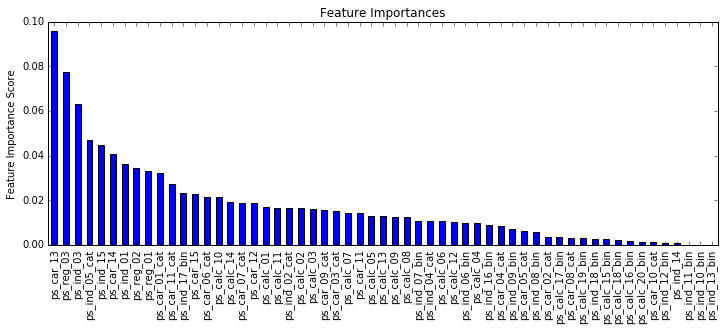

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, targer,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, label=target.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, target,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(target.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(target, dtrain_predprob)
                    
    feat_imp = pd.Series(alg.feature_importances_, dtrain.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=80,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, target)

In [51]:
from sklearn.feature_selection import SelectFromModel

clf = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=80,
 scale_pos_weight=1,
 seed=27)
clf = clf.fit(train, target)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(train)
X_new.shape 

#This is choosing 23 features out of 50 features

(595212, 23)

In [50]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


def modelfit(alg, dtrain, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain, target, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(target.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(target, dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, dtrain.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        

gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=7, min_samples_split=600,min_samples_leaf=50, subsample=0.80, random_state=10, max_features=31)
modelfit(gbm_tuned_2, train, target)

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_selection import SelectFromModel

clf = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=7, min_samples_split=600,min_samples_leaf=50, subsample=0.80, random_state=10, max_features=31)
clf = clf.fit(train, target)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(train)
X_new.shape 